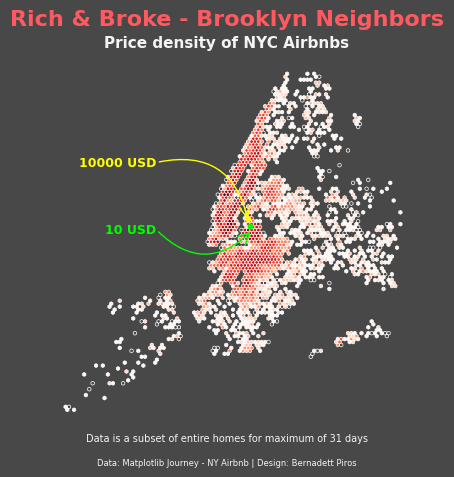

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from drawarrow import ax_arrow

url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/newyork-airbnb/newyork-airbnb.csv"
df = pd.read_csv(url)

entire_home=df[(df["room_type"]=="Entire home/apt") & (df["price"] > 0) & (df["minimum_nights"] <= 31)]
max_price=entire_home[(entire_home["price"]==entire_home["price"].max()) & (entire_home["neighbourhood"].isin(["Greenpoint"]))]
min_price=entire_home[(entire_home["price"]==entire_home["price"].min()) & (entire_home["neighbourhood"].isin(["Greenpoint"]))]

fig, ax = plt.subplots(figsize=(4.8, 4.8))

ax.hexbin(entire_home['longitude'], entire_home['latitude'], C=entire_home["price"]<200, reduce_C_function=np.sum,
             cmap="Reds", bins="log", gridsize=100, mincnt=1, edgecolor="#ffffff", lw=0.5)

ax.scatter(max_price['longitude'], max_price['latitude'], s=10, c="yellow", zorder=10)
ax.scatter(min_price['longitude'], min_price['latitude'], s=10, c="lime", zorder=10)

ax_arrow(
    tail_position=[-74.1, 40.72],
    head_position=[-73.95, 40.72],
    color="lime",
    fill_head=False,
    width=1,
    radius=0.5,
    ax=ax,
)

ax.text(-74.1, 40.72, "10 USD", size=9, weight="bold", color="lime", va="center", ha="right")

ax_arrow(
    tail_position=[-74.1, 40.8],
    head_position=[-73.957, 40.73],
    color="yellow",
    fill_head=False,
    width=1,
    radius=-0.5,
    ax=ax,
)

ax.text(-74.1, 40.8, "10000 USD", size=9, weight="bold", color="yellow", va="center", ha="right")

ax.set_xticks([])
ax.set_yticks([])

ax.spines[["top", "bottom", "left", "right"]].set_visible(False)

fig.suptitle("Rich & Broke - Brooklyn Neighbors", size=16, weight="bold", color="#FF5A5F")
fig.text(0.5, 0.9, "Price density of NYC Airbnbs", size=11, weight="bold", color="#F4F4F4FF", ha="center")
fig.text(0.5, 0.08, "Data is a subset of entire homes for maximum of 31 days", size=7, color="#F4F4F4FF", ha="center")

ax.set_facecolor("#484848")
fig.set_facecolor("#484848")

fig.text(0.5, 0.03, "Data: Matplotlib Journey - NY Airbnb | Design: Bernadett Piros",
         size=6, ha="center", color="#F4F4F4FF")

plt.show()

#plt.savefig("Hexbin_NY_Airbnb", dpi=300, bbox_inches='tight', pad_inches=0.2)